In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 데이터 표준화(d 차원)

In [2]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 공분산 행렬 만들기

In [3]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
cov_mat

array([[ 1.00961538, -0.16628112,  0.85436016,  0.78898935],
       [-0.16628112,  1.00961538, -0.49583462, -0.40900104],
       [ 0.85436016, -0.49583462,  1.00961538,  0.96482461],
       [ 0.78898935, -0.40900104,  0.96482461,  1.00961538]])

### 공분산 행렬을 고유값과 고유벡터로 분해 

In [4]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)
print(eigen_vecs)

[2.95331455 0.87663108 0.18554473 0.02297119]
[[ 0.50758884 -0.41886102 -0.7096898   0.25149435]
 [-0.30863616 -0.90320406  0.26146299 -0.14353834]
 [ 0.57903122 -0.02803196  0.14664708 -0.80151836]
 [ 0.55840857 -0.08939849  0.63755167  0.52317841]]


### 가장 큰 고유값(k)에 대한 고유벡터(k vector) 선택, k는 새로운 feature 부분공간의 차원( k <= d )

In [5]:
from operator import itemgetter
indices, eigen_sorted = zip(*sorted(enumerate(eigen_vals), reverse=True, key=itemgetter(1)))
topk = indices[0]
top_eigenvectors = eigen_vecs[topk]
top_eigenvectors

array([ 0.50758884, -0.41886102, -0.7096898 ,  0.25149435])

### 고유벡터(k)로 부터 투영행렬 W 생성

In [6]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(2.9533145485533017,
  array([ 0.50758884, -0.30863616,  0.57903122,  0.55840857])),
 (0.8766310757215627,
  array([-0.41886102, -0.90320406, -0.02803196, -0.08939849])),
 (0.1855447276223351,
  array([-0.7096898 ,  0.26146299,  0.14664708,  0.63755167])),
 (0.022971186564342865,
  array([ 0.25149435, -0.14353834, -0.80151836,  0.52317841]))]

In [7]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis], eigen_pairs[1][1][:,np.newaxis]))
w

array([[ 0.50758884, -0.41886102],
       [-0.30863616, -0.90320406],
       [ 0.57903122, -0.02803196],
       [ 0.55840857, -0.08939849]])

### 투영행렬 W를 사용하여 d 차원의 입력 데이터를 변환, k 차원 데이터 생성

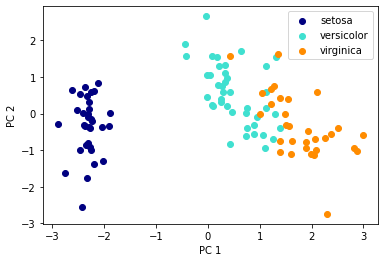

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

X_train_pca = X_train_std.dot(w)
colors = ['navy', 'turquoise', 'darkorange']
for l,c,m in zip(np.unique(y_train), colors, target_names):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()
                

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,KernelPCA
from sklearn.metrics import accuracy_score
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# PCA실행
pca = PCA()
kpca_rbf = KernelPCA(kernel='rbf',n_components=2)
kpca_simoid = KernelPCA(kernel='sigmoid',n_components=2)

X_r2 = pca.fit_transform(X)
X_rbf = kpca_rbf.fit_transform(X)
X_sigmoid = kpca_simoid.fit_transform(X)
# None , PCA , KPCA(rbf), KPCA(sigmoid)
X_train ,X_test,y_train,y_test=  train_test_split(X,y, test_size= 0.3)
X_train_pca ,X_test_pca,y_train_pca,y_test_pca=  train_test_split(X_r2,y, test_size= 0.2)
X_train_rbf ,X_test_rbf,y_train_rbf,y_test_rbf=  train_test_split(X_rbf,y, test_size= 0.2)
X_train_sigmoid ,X_test_sigmoid,y_train_sigmoid,y_test_sigmoid = train_test_split(X_sigmoid,y, test_size= 0.2)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
print(" None PAC : " ,accuracy_score(dt_clf.predict(X_test),y_test))

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_pca,y_train_pca)
print(" PAC : " ,accuracy_score(dt_clf.predict(X_test_pca),y_test_pca))

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_rbf,y_train_rbf)
print(" rbf : " ,accuracy_score(dt_clf.predict(X_test_rbf),y_test_rbf))

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_sigmoid,y_train_sigmoid)
print(" sigmoid : " ,accuracy_score(dt_clf.predict(X_test_sigmoid),y_test_sigmoid))






 None PAC :  0.9555555555555556
 PAC :  0.9666666666666667
 rbf :  0.8666666666666667
 sigmoid :  0.8333333333333334


### scikit-learn

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()